# Manipulação Estatística em dados Meteorologicos
----
- Manipular estruturas de dados 2d (bidimensionais) usando as estruturas Python dos pacote Numpy e PANDAS*.
- Mineirar, manipular e aplicar tratamento estatístico em séries temporais meteorológicas.

 \* Pacote para análise de dados - [http://pandas.pydata.org/](http://pandas.pydata.org/)

# PARTE 01
Na Parte 01 vamos utilizar uma série temporal de contações diárias de um ativo financeiro
como fonte de dados para compreender os conceitos (termos) e algumas das funcionalidades das 
estruturas(objetos) de manipulação de dados. 

Os principais objetos do PANDAS são:
    - Series : comporta-se como um array numpy 1d. 
        - Aceita quisquer tipos de dados
        - Operações vetorizadas
        - Sintaxe: s = Series; Ex: s1 = [0,1,2,3,4,5]
    
    - DataFrame: comporta-se como uma matriz bidimensional (2d numpy array like)
        - Aceita quisquer tipos de dados. 
        - Possui um índice por padrão (1 coluna) que pode ser alterado e/ou reorganizado
        - As colunas possuem nome
        - As colunas podem ser movidas e/ou reorganizadas
        - As colunas podem ser criadas a partir de operações matemáticas (*operations on rows*)
        - Referências em *prior rows* pelo método .diff()
        - Relevantes Funções de biblioteca:
            - Média móvel *rolling means in PANDAS*
            - Desvio padrão, correlação, covariançia, etc
            - Gráficos (usa a biblioteca matplotlib - http://matplotlib.org/)
        - Operações vetorizadas.
        - Sintaxe: df = DataFrame(data, index=index, columns=list); 
            Ex: df = DataFrame(np.random.randn(8, 3), index=index, columns=['A', 'B', 'C'])
    
* Os objetos Series e Dataframe também pode se comportar como dicionários *dictionary like*
* Praticamente todos os objetos possuem o método para fatiamento *slicing* para seleção de dados.
    


## Obtendo (mineirando) e preparando a base de dados

Com finalidade prática, vamos usar uma série histórica, mineirando alguns dados da cotação do 
ativo CSNA públicos disponíveis na web via yahoo finance e armazenar um conjunto em um arquivo
do tipo `.csv`


In [1]:
import pandas as pd
from pandas import DataFrame

import datetime
import pandas.io.data  ## Vamos utilizar para acesso à API do Yahoo finance e importação de dados

import matplotlib.pyplot as plt

In [2]:

csna3 = pd.io.data.get_data_yahoo('CSNA3.SA',
                                  start = datetime.datetime(2000,10,1),
                                  end = datetime.datetime(2015,7,10))

# o Método .head() mostra as primeiras linhas do objeto
csna3.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-10-02,19.50000,19.50000,19.00001,19.28333,7034400,481.03537
2000-10-03,19.66332,19.83334,19.17334,19.17334,16718400,478.29154
2000-10-04,19.49333,19.49333,19.10666,19.23334,7365600,479.78828
2000-10-05,19.23334,19.23334,19.23334,19.23334,0,479.78828
2000-10-06,19.36668,19.36668,19.13333,19.21668,3924000,479.37280


**Resultado da chamada ao método `.head()` via comando `csna3.head()`**

<pre>
	Open	High	Low	Close	Volume	Adj Close
Date						
2000-10-02	19.50000	19.50000	19.00001	19.28333	7034400	481.03537
2000-10-03	19.66332	19.83334	19.17334	19.17334	16718400	478.29154
2000-10-04	19.49333	19.49333	19.10666	19.23334	7365600	479.78828
2000-10-05	19.23334	19.23334	19.23334	19.23334	0	479.78828
2000-10-06	19.36668	19.36668	19.13333	19.21668	3924000	479.37280
</pre>

In [3]:
# Salvar o dados do DataFrame para o formato .csv
csna3.to_csv('csna3_ohlc.csv')

A partir desse momento, não precisamos mais importar os dados do *yahoo finance*.
Carregaremos os dados diretamente a partir do arquivo csv criado.

In [4]:
# Lendo o arquivo .csv [pd.read_csv('arquivo.csv')]
# Comente sobre os dois argumentos além do filename
df = pd.read_csv('csna3_ohlc.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-10-02,19.50000,19.50000,19.00001,19.28333,7034400,481.03537
2000-10-03,19.66332,19.83334,19.17334,19.17334,16718400,478.29154
2000-10-04,19.49333,19.49333,19.10666,19.23334,7365600,479.78828
2000-10-05,19.23334,19.23334,19.23334,19.23334,0,479.78828
2000-10-06,19.36668,19.36668,19.13333,19.21668,3924000,479.37280


### Operação com colunas

In [5]:
# Especificando apenas uma coluna (via string '')
df2 = df['Open']
df2.head()

Date
2000-10-02    19.50000
2000-10-03    19.66332
2000-10-04    19.49333
2000-10-05    19.23334
2000-10-06    19.36668
Name: Open, dtype: float64

In [6]:
# Especificando multiplas colunas (via lista[])
df3 = df[['Open', 'Close']]
df3.head()

,Open,Close
Date,,
2000-10-02,19.50000,19.28333
2000-10-03,19.66332,19.17334
2000-10-04,19.49333,19.23334
2000-10-05,19.23334,19.23334
2000-10-06,19.36668,19.21668


In [7]:
# Removendo uma coluna
df3_tmp = df3.copy() # Criando uma cópia de segurança
del df3['Close']
df3.head()

,Open
Date,
2000-10-02,19.50000
2000-10-03,19.66332
2000-10-04,19.49333
2000-10-05,19.23334
2000-10-06,19.36668


In [8]:
df3 = df3_tmp.copy() # Restaurando o df3 ao estado anterior
del df3_tmp          # Removendo a cópia de segurança
df3.head()

,Open,Close
Date,,
2000-10-02,19.50000,19.28333
2000-10-03,19.66332,19.17334
2000-10-04,19.49333,19.23334
2000-10-05,19.23334,19.23334
2000-10-06,19.36668,19.21668


In [9]:
df3.head()

,Open,Close
Date,,
2000-10-02,19.50000,19.28333
2000-10-03,19.66332,19.17334
2000-10-04,19.49333,19.23334
2000-10-05,19.23334,19.23334
2000-10-06,19.36668,19.21668


In [10]:
# Renomeando as colunas
df3.rename(columns={'Close': 'CLOSE'}, inplace=True)
df3.head()

,Open,CLOSE
Date,,
2000-10-02,19.50000,19.28333
2000-10-03,19.66332,19.17334
2000-10-04,19.49333,19.23334
2000-10-05,19.23334,19.23334
2000-10-06,19.36668,19.21668


In [11]:
# Filtrando dados via condição lógica `df3[(condição-logica)]`
df4 = df3[(df3['CLOSE'] > 1)] # Seleciona onde valores de CLOSE são > 1
df4.head()

,Open,CLOSE
Date,,
2000-10-02,19.50000,19.28333
2000-10-03,19.66332,19.17334
2000-10-04,19.49333,19.23334
2000-10-05,19.23334,19.23334
2000-10-06,19.36668,19.21668


In [12]:
# Criando colunas com colunas a partir de operações matemáticas
df['H-L'] = df['High'] - df.Low   
df.head()

,Open,High,Low,Close,Volume,Adj Close,H-L
Date,,,,,,,
2000-10-02,19.50000,19.50000,19.00001,19.28333,7034400,481.03537,0.49999
2000-10-03,19.66332,19.83334,19.17334,19.17334,16718400,478.29154,0.66000
2000-10-04,19.49333,19.49333,19.10666,19.23334,7365600,479.78828,0.38667
2000-10-05,19.23334,19.23334,19.23334,19.23334,0,479.78828,0.00000
2000-10-06,19.36668,19.36668,19.13333,19.21668,3924000,479.37280,0.23335


Note que usamos duas formas (ambas são aceitas) para nos referir às colunas *High* e *Low* no *DataFrame*:  `df['High']` e `df.Low`

In [13]:
# Médias móveis (em pandas `pd.rolling_mean()`)
# Criando uma coluna com a Media móvel com janela de 100 períodos
df['100MA'] = pd.rolling_mean(df['Close'], 100) 
print df[200:205]  # Os primeiros 100 valores serão NaN

                Open      High       Low     Close    Volume  Adj Close  \
Date                                                                      
2001-07-11  12.66667  12.73332  12.23333  12.33334  12981600  307.66321   
2001-07-12  12.27334  13.00001  12.23333  12.83666  10612800  320.21909   
2001-07-13  12.83333  13.00001  12.76668  12.83333   4687200  320.13585   
2001-07-16  12.83333  13.16666  12.60000  12.98333   1166400  323.87770   
2001-07-17  12.87667  13.31333  12.86666  13.20000   4269600  329.28273   

                H-L      100MA  
Date                            
2001-07-11  0.49999  16.626403  
2001-07-12  0.76668  16.519136  
2001-07-13  0.23333  16.406469  
2001-07-16  0.56666  16.295301  
2001-07-17  0.44667  16.186300  


In [14]:
# Referências em *prior rows* pelo método .diff()
# Criando uma nova colunas com valores calculados
# de uma coluna ['Close'] menos o valor anterior (por linhas)
df['Diferenca'] = df['Close'].diff()
df.head()

,Open,High,Low,Close,Volume,Adj Close,H-L,100MA,Diferenca
Date,,,,,,,,,
2000-10-02,19.50000,19.50000,19.00001,19.28333,7034400,481.03537,0.49999,NaN,NaN
2000-10-03,19.66332,19.83334,19.17334,19.17334,16718400,478.29154,0.66000,NaN,-0.10999
2000-10-04,19.49333,19.49333,19.10666,19.23334,7365600,479.78828,0.38667,NaN,0.06000
2000-10-05,19.23334,19.23334,19.23334,19.23334,0,479.78828,0.00000,NaN,0.00000
2000-10-06,19.36668,19.36668,19.13333,19.21668,3924000,479.37280,0.23335,NaN,-0.01666


### Gráficos

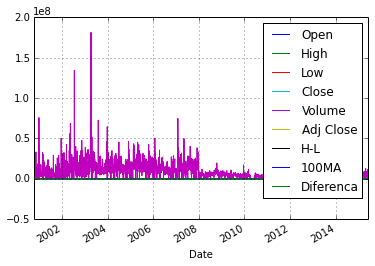

In [23]:
figure(figsize=(16,8))
# Grafico do DataFrame Inteiro
df.plot()
savefig('img-df-inteiro.png')

Observa-se que *plotar* um gráfico do DtaFrame inteiro não tem muita serventia, pois algumas informações ficam mascaradas uma vez que todas compartilham o mesmo eixo de imagem (y).

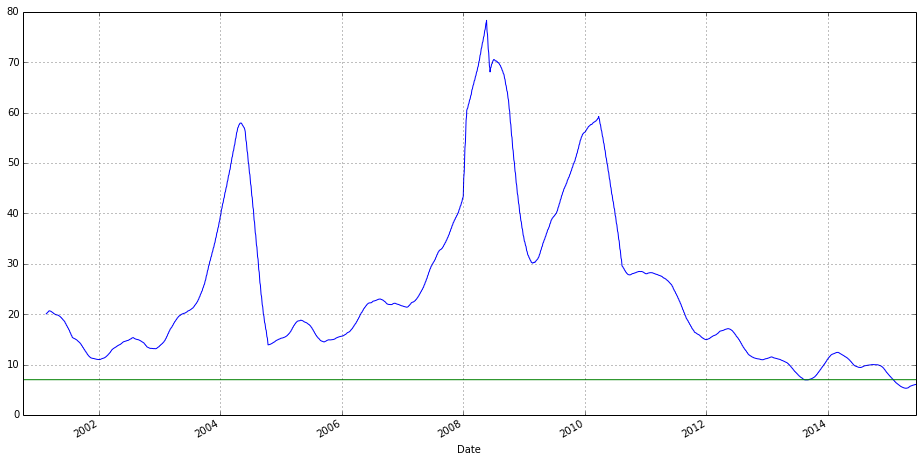

In [31]:
# Gráfigo de uma coluna específica
# Gráfico da média móvel 100MA
figure(figsize=(16,8))
df['100MA'].plot()
df['hpm'] = 7.02
df['hpm'].plot()
savefig('img-df-hpm-100MA.png')

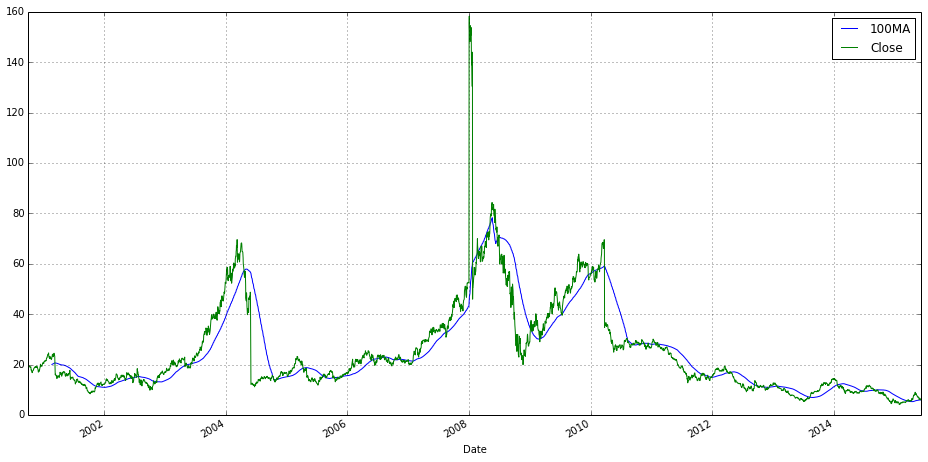

In [49]:
# Gráfigo de colunas múltiplas
# Gráfico da média móvel 100MA e Close
figure(figsize=(16,8))
df['100MA'].plot(legend=True)
df['Close'].plot(legend=True)
#df[['Close','100MA']].plot()
savefig('img-df-Close+100MA.png')

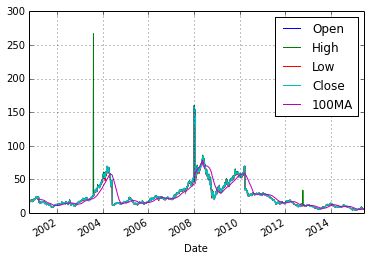

In [50]:
# Gráfigo de colunas múltiplas
# Gráfico da média móvel 100MA e Close
figure(figsize=(16,8))
df[['Open','High','Low','Close','100MA']].plot()
savefig('img-df-ohlc+100MA.png')

### Gráficos 3D
Para traçar gráficos 3D, é necessário a importação de alguns módulos do pacote **mpl_toolkits**. O principal módulo aser importado é o *mplot3d*  via comando `from mpl_toolkits.mplot3d import Axes3D`.

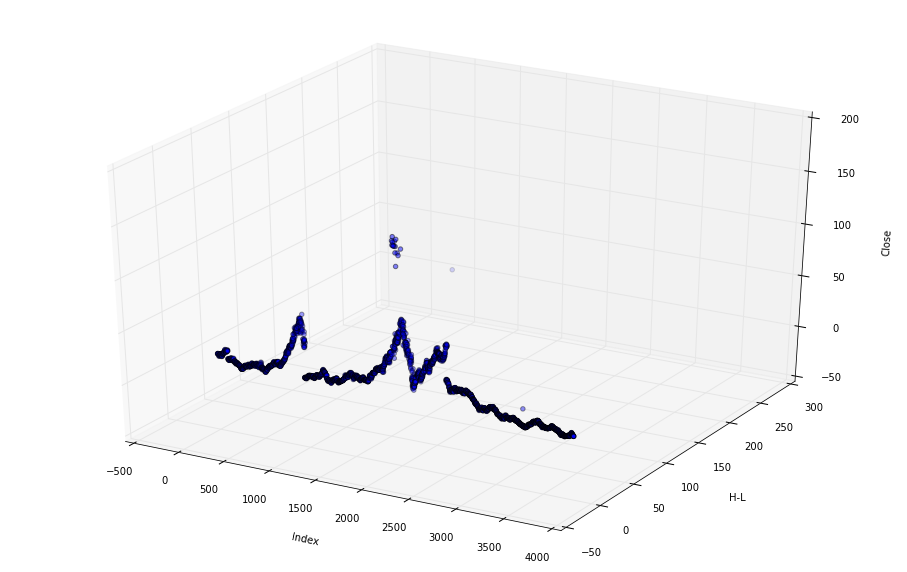

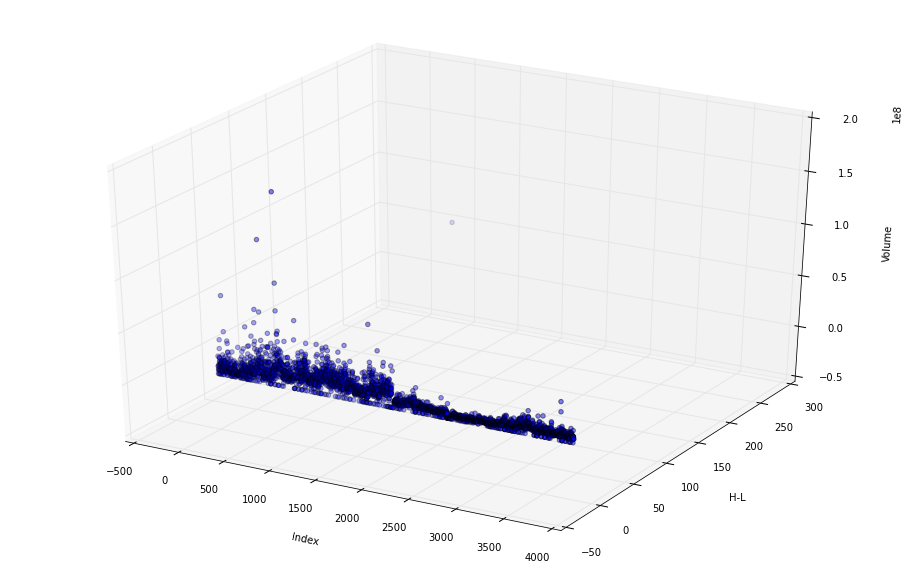

In [83]:
'''
    Pode-se usar um grágico 3D para mostrar o preço de fechamento 
    (*Close*) do ativo em função do volume de operações e a covariância 
    entre esses dados. Interessante se pudermos usar o mouse para mudar
    a visão. Nos demais casos é melhor um gráfico de espalhamento
    bidimensional.
'''
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
graf3d = fig.gca(projection='3d')

#============================================================
#           Recriando o DataFrame com indice inteiro
#
df = pd.read_csv('csna3_ohlc.csv', parse_dates=True)
df['H-L'] = df.High - df.Low
df['100MA'] = pd.rolling_mean(df['Close'], 100) 
df['Diferenca'] = df['Close'].diff()
#============================================================
# df.index é o índice dos dados
graf3d.scatter(df.index, df['H-L'], df['Close'], alpha=0.5) 
# Nomeando os 3 eixos
graf3d.set_xlabel('Index')
graf3d.set_ylabel('H-L')
graf3d.set_zlabel('Close')
fig.show()
savefig('img-df-3d-HLxClose.png')

# Comportamento de H-L responde a variação no Volume
fig = plt.figure(figsize=(16,10))
graf3d =fig.gca(projection='3d')
graf3d.scatter(df.index, df['H-L'], df['Volume'], alpha=0.5) 
# Nomeando os 3 eixos
graf3d.set_xlabel('Index')
graf3d.set_ylabel('H-L')
graf3d.set_zlabel('Volume')
fig.show()
savefig('img-df-3d-HLxVol.png')


### Múltipos Gráficos (*subplots*)


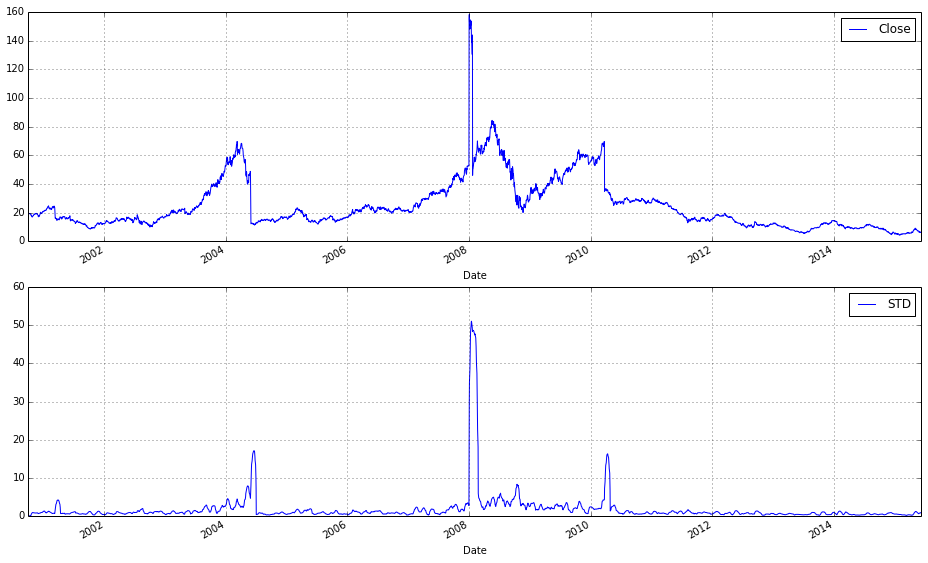

In [3]:
""" Adicionando uma coluna ao DataFrame para adicionar o cálculo do
    valor do Desvio Padrão (*STD*)
    
    .sublot(rows,cols, plot-number)
"""
#============================================================
#         Recriando o DataFrame com indice sendo a Data
#
df = pd.read_csv('csna3_ohlc.csv', index_col='Date', parse_dates=True)
df['H-L'] = df.High - df.Low
df['100MA'] = pd.rolling_mean(df['Close'], 100, min_periods=1) 
df['Diferenca'] = df['Close'].diff()
#============================================================

df['STD'] = pd.rolling_std(df['Close'], 25, min_periods=1)

fig = plt.figure(figsize=(16,10))

# Criando eixos para multiplot
# Superior (Linha 1)
ax1 = plt.subplot(2,1,1)
# ax1.plot(df['Close'])             # usando matplotlib diretamente
df['Close'].plot(legend=True)       # usando pandas

# Inferior (Linha 2)
# se quiser compartilhar o eixo .subplot(2,1,2, sharex = ax1)
ax2 = plt.subplot(2,1,2) 
df['STD'].plot(legend=True)    
fig.show()
savefig('img-df-mpl-close-std.png')


### Informações Estatísticas 
A Descrição Estatística de um DataFrame (Das séries em geral) é obtida pelo método comum `.describe`. 

O exemplo abaixo permite estimar os mais comuns (principais - [Distribuição Normal e Escalas](https://pt.wikipedia.org/wiki/Estat%C3%ADstica#/media/File:Normal_distribution_and_scales.gif)) parâmetros estatísticos sobre uma série de dados.
<pre>
In [76]: series.describe()
Out[76]: 
count    500.000000
mean      -0.039663
std        1.069371
min       -3.463789
25%       -0.731101
50%       -0.058918
75%        0.672758
max        3.120271
dtype: float64
</pre>
Uma coluna de um DataFrame possui o método `.describe()`

In [4]:
# Já que cada coluna do DataFrame comporta-se como uma série,
# pode-se invocar o método `.describe` em todo o DataFrame

df.describe()

,Open,High,Low,Close,Volume,Adj Close,H-L,100MA,Diferenca,STD
count,3803.000000,3803.000000,3803.000000,3803.000000,3.803000e+03,3803.000000,3803.000000,3803.000000,3802.000000,3803.000000
mean,24.811496,25.244435,24.294273,24.741367,9.027220e+06,152.575627,0.950162,24.900055,-0.003460,1.867407
std,18.473572,18.779241,17.713390,18.037375,8.764354e+06,306.823948,4.015528,16.316829,2.599307,4.640866
min,4.240000,4.360000,4.150000,4.160000,0.000000e+00,1.118900,0.000000,5.316200,-98.000000,0.000000
25%,12.850000,13.056660,12.605000,12.834995,3.893100e+06,4.795550,0.370005,13.728867,-0.269220,0.593247
50%,18.503330,18.830000,18.150000,18.540000,6.496600e+06,11.553060,0.600000,18.841438,0.000000,0.894265
75%,29.741680,30.109980,29.300000,29.700000,1.199250e+07,215.073115,1.050000,31.359862,0.305827,1.644447
max,266.666390,266.666390,154.999800,158.299800,1.815048e+08,1737.050170,240.966470,78.320594,102.486840,51.032749


In [9]:
'''
    Correlação = Relação na variação entre duas grandezas. Quão 
    influente é a variação de uma variável como causa da variação
    da outra. Obs: Correlação não é causa.
    
    Covariância = Medida da força da correlação. Quão forte é a 
    influência de uma sobre a outra.
'''

# Mostrando a correlação
df.corr()

,Open,High,Low,Close,Volume,Adj Close,H-L,100MA,Diferenca,STD
Open,1.000000,0.999422,0.977042,0.976549,-0.014399,0.208657,0.364000,0.837040,0.058584,0.478614
High,0.999422,1.000000,0.977471,0.977597,-0.011023,0.209503,0.364814,0.837825,0.062991,0.482753
Low,0.977042,0.977471,1.000000,0.999511,-0.044629,0.207161,0.160071,0.855673,0.068404,0.488228
Close,0.976549,0.977597,0.999511,1.000000,-0.039346,0.209350,0.162815,0.856632,0.072933,0.492019
Volume,-0.014399,-0.011023,-0.044629,-0.039346,1.000000,0.218798,0.145319,-0.079832,0.013917,-0.034644
Adj Close,0.208657,0.209503,0.207161,0.209350,0.218798,1.000000,0.065941,0.111932,0.011231,0.003735
H-L,0.364000,0.364814,0.160071,0.162815,0.145319,0.065941,1.000000,0.143655,-0.007162,0.103987
100MA,0.837040,0.837825,0.855673,0.856632,-0.079832,0.111932,0.143655,1.000000,-0.026305,0.425028
Diferenca,0.058584,0.062991,0.068404,0.072933,0.013917,0.011231,-0.007162,-0.026305,1.000000,-0.061511
STD,0.478614,0.482753,0.488228,0.492019,-0.034644,0.003735,0.103987,0.425028,-0.061511,1.000000


In [6]:
# Mostrando a Covariância
df.cov()

,Open,High,Low,Close,Volume,Adj Close,H-L,100MA,Diferenca,STD
Open,341.272876,346.719038,319.717081,325.400644,-2.331307e+06,1.182694e+03,27.001958,252.308925,2.813476,41.033214
High,346.719038,352.659877,325.149794,331.139621,-1.814203e+06,1.207139e+03,27.510083,256.724361,3.075124,42.072852
Low,319.717081,325.149794,313.764177,319.346962,-6.928476e+06,1.125895e+03,11.385617,247.311982,3.149892,40.135004
Close,325.400644,331.139621,319.346962,325.346887,-6.220104e+06,1.158608e+03,11.792659,252.117609,3.419856,41.186467
Volume,-2331307.421292,-1814202.747996,-6928476.375170,-6220103.896666,7.681389e+13,5.883724e+08,5114273.627173,-11416515.482510,317093.897284,-1409129.904133
Adj Close,1182.693626,1207.138737,1125.895261,1158.607775,5.883724e+08,9.414094e+04,81.243476,560.377611,8.956802,5.317812
H-L,27.001958,27.510083,11.385617,11.792659,5.114274e+06,8.124348e+01,16.124466,9.412379,-0.074768,1.937848
100MA,252.308925,256.724361,247.311982,252.117609,-1.141652e+07,5.603776e+02,9.412379,266.238895,-1.115776,32.184880
Diferenca,2.813476,3.075124,3.149892,3.419856,3.170939e+05,8.956802e+00,-0.074768,-1.115776,6.756398,-0.742094
STD,41.033214,42.072852,40.135004,41.186467,-1.409130e+06,5.317812e+00,1.937848,32.184880,-0.742094,21.537637


In [8]:
# Se quisermos apenas a estatística comparativa entre duas variáveis
df[['Volume', 'H-L']].corr()

,Volume,H-L
Volume,1.000000,0.145319
H-L,0.145319,1.000000


**Exercício 1 - ** *Construa uma tabela das correlações entre vários ativos. Use os dados públicos Yahoo finance para obter as séries históricas e descreva como você observa as correlações entre os ativos de alguns segmentos.*

**Exercício 2 - ** *Aplique os conceitos (termos) e as funcionalidades das estruturas(objetos) que você aprendeu nessa aula em um conjunto de séries históricas meteorológicas.*

Fonte de dados para utilizar: http://200.132.24.235/csda/topicos-met.csv.zip

----
## *Map Functions*

Vamos refazer algumas operações utilizando *map functions* ao invés dos 
métodos do pandas. É importante saber como fazer algumas coisas do jeito "difícil" ou como se diz "à unha", pois nem sempre se quer utilizar
*black boxes* embora tudo no python seja *open source*.

O Exemplo abaixo ilustra a possibilidade de você criar sua própria função e aplicá-la a cada valor (linha por linha) da coluna de um DataFrame. Esse exemplo é interessante pois a sua função particular pode receber quantos e quais parâmetros você quiser.

In [17]:
#============================================================
#         Criando o DataFrame com indice sendo a Data
#
df = pd.read_csv('csna3_ohlc.csv', index_col='Date', parse_dates=True)
#============================================================
import random

def function(data):
    '''
        Recebe o parâmetro data como argumento e o retorna multiplicado
        por um numero aleatorio entre 0 e 5
    '''
    x = random.randrange(0,5)
    return data*x



df['Multiple'] = map(function, df['Close'])
df.head()

,Open,High,Low,Close,Volume,Adj Close,Multiple
Date,,,,,,,
2000-10-02,19.50000,19.50000,19.00001,19.28333,7034400,481.03537,57.84999
2000-10-03,19.66332,19.83334,19.17334,19.17334,16718400,478.29154,76.69336
2000-10-04,19.49333,19.49333,19.10666,19.23334,7365600,479.78828,76.93336
2000-10-05,19.23334,19.23334,19.23334,19.23334,0,479.78828,19.23334
2000-10-06,19.36668,19.36668,19.13333,19.21668,3924000,479.37280,38.43336


----
Elaborado por Hans Rogerio Zimermann para o curso **FSC878 - Topicos Especiais II** PPGMET - UFSM.